# Drug Classification

In [1]:
import pandas as pd
import numpy as np
from matplotlib import style
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Data cleansing

In [5]:
df_clean = df.copy()

Check null value

In [6]:
df_clean.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Edit Drug column

In [7]:
df_clean['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [8]:
df_clean['Drug'] = df_clean['Drug'].str.replace('d','D')

In [9]:
df_clean['Drug'].unique()

array(['DrugY', 'DrugC', 'DrugX', 'DrugA', 'DrugB'], dtype=object)

Check Outlier

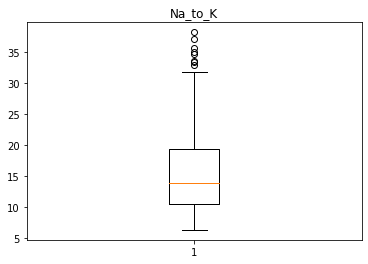

In [10]:
plt.boxplot(df_clean['Na_to_K'])
plt.title('Na_to_K')
plt.show()

In [11]:
tenth_q = df_clean['Na_to_K'].quantile(0.10)
ninth_q = df_clean['Na_to_K'].quantile(0.90)
df_clean['Na_to_K'] = np.where(df_clean['Na_to_K'] < tenth_q, tenth_q, df_clean['Na_to_K'])
df_clean['Na_to_K'] = np.where(df_clean['Na_to_K'] > ninth_q, ninth_q, df_clean['Na_to_K'])

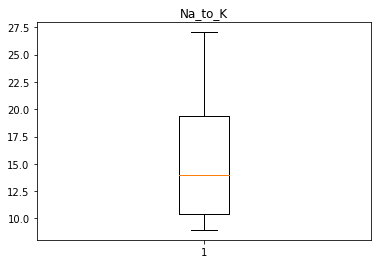

In [12]:
plt.boxplot(df_clean['Na_to_K'])
plt.title('Na_to_K')
plt.show()

## Data Wragling

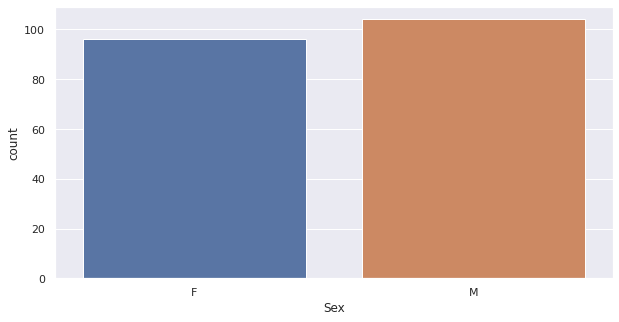

In [13]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="Sex", data=df_clean)
plt.show()

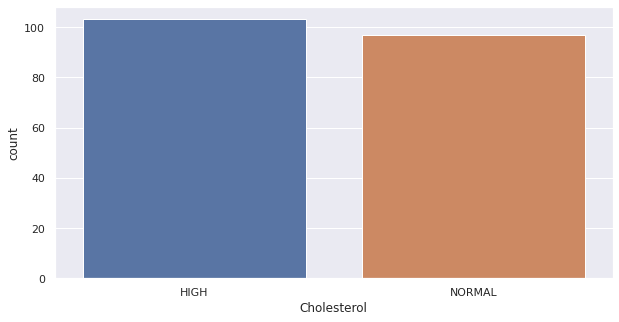

In [13]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="Cholesterol", data=df_clean)
plt.show()

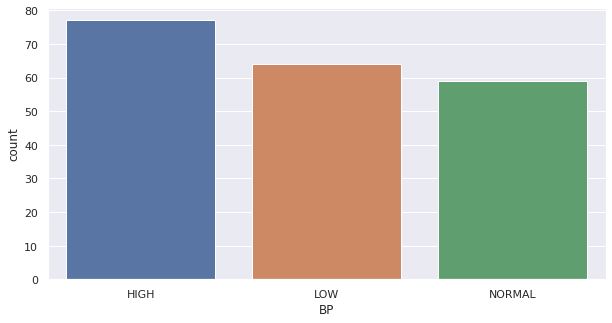

In [14]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="BP", data=df_clean)
plt.show()

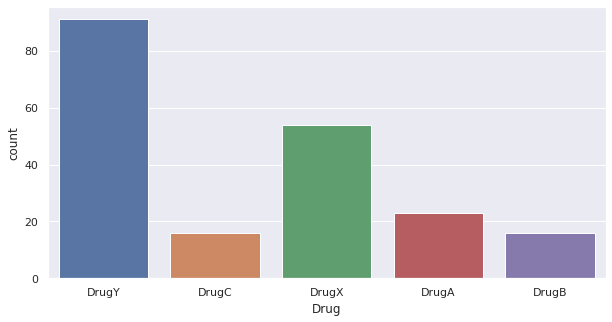

In [15]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="Drug", data=df_clean)
plt.show()

In [14]:
df_wrag = df_clean.copy()

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_wrag["Sex"] = label_encoder.fit_transform(df_wrag["Sex"])
df_wrag["Cholesterol"] = label_encoder.fit_transform(df_wrag["Cholesterol"]) 

In [16]:
BP_Dict = {"HIGH": 1, "NORMAL" : 0,"LOW" : -1}

df_wrag["Ordinal_BP"] = df_wrag.BP.map(BP_Dict)
df_wrag.drop(["BP"], axis=1, inplace=True)

In [19]:
!pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 2.8 MB/s 


In [17]:
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['Drug'], mapping=[{'col':'Drug', 'mapping':{'DrugA':0, 'DrugB':1, 'DrugC':2, 'DrugX':3, 'DrugY':4}}])
df_wrag["Drug"] = encoder.fit_transform(df_wrag["Drug"])
df_wrag["Drug"] = df_wrag["Drug"].astype('str')

In [18]:
df_wrag.head()

,Age,Sex,Cholesterol,Na_to_K,Drug,Ordinal_BP
0,23,0,0,25.3550,4,1
1,47,1,0,13.0930,2,-1
2,47,1,0,10.1140,2,-1
3,28,0,0,8.9444,3,0
4,61,0,0,18.0430,4,-1


## Data Processing

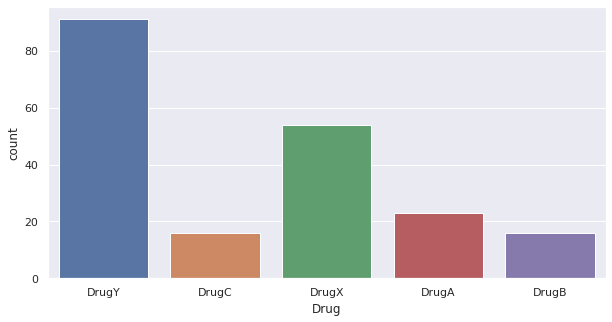

In [19]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x="Drug", data=df_clean)
plt.show()

In [23]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
df_model = df_wrag.copy()
X = df_model.drop('Drug', axis=1)
y = df_model['Drug']

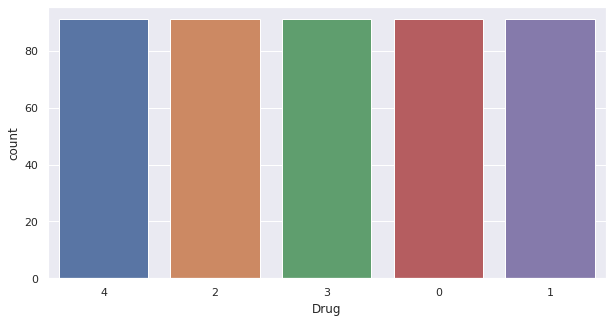

In [21]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_resample(X, y)

sns.countplot(x=y_sm)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state=0)

**k-NN**

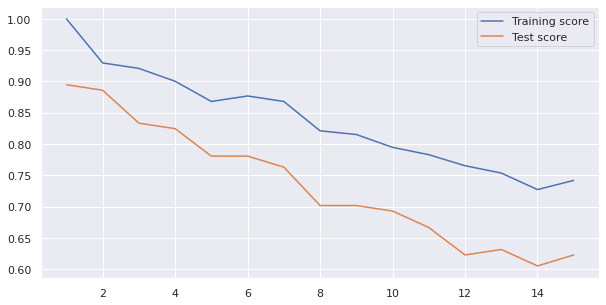

In [23]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbor = np.arange(1,16)
train_score = []
test_score = []

for i in n_neighbor:
  knn = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
  train_score.append(knn.score(X_train, y_train))
  test_score.append(knn.score(X_test, y_test))

plt.plot(n_neighbor, train_score, label='Training score')
plt.plot(n_neighbor, test_score, label='Test score')
plt.legend()
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {"n_neighbors":np.arange(1,16)}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid)
knn_grid.fit(X_train, y_train) 
print(knn_grid.best_params_)

{'n_neighbors': 1}


In [25]:
knn_best = KNeighborsClassifier(n_neighbors=knn_grid.best_params_['n_neighbors']).fit(X_train, y_train)
print(knn_best.score(X_train, y_train))
print(knn_best.score(X_test, y_test))

1.0
0.8947368421052632


**Naive Bayes**

In [26]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(X_train, y_train)
print("Train score : {:.4f}".format(nb.score(X_train, y_train)))
print("Train score : {:.4f}".format(nb.score(X_test, y_test)))

Train score : 0.9589
Train score : 0.9386


**Decision Tree**

In [27]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(random_state=42).fit(X_train.values, y_train)
print("Train score : {:.4f}".format(tree_clf.score(X_train.values, y_train)))
print("Train score : {:.4f}".format(tree_clf.score(X_test.values, y_test)))

Train score : 1.0000
Train score : 1.0000


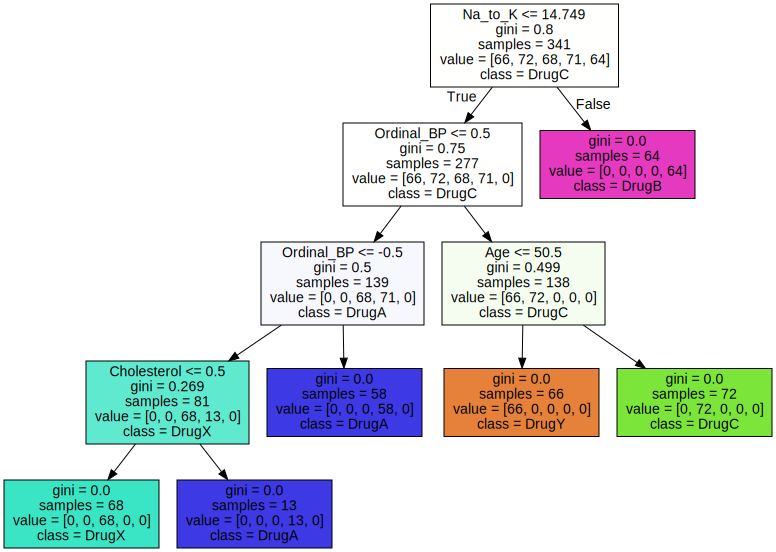

In [34]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                                feature_names=df_wrag.drop('Drug', axis=1).columns,  
                                class_names=df_clean['Drug'].unique(),
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [29]:
from sklearn.metrics import classification_report, f1_score

In [30]:
knn_pred = knn_best.predict(X_test)
nb_pred = nb.predict(X_test)
tree_pred = tree_clf.predict(X_test.values)

In [31]:
print("k-Nearest Neighbors")
print(classification_report(y_test, knn_pred)) 

k-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        25
           1       0.86      1.00      0.93        19
           2       0.95      0.91      0.93        23
           3       0.76      0.80      0.78        20
           4       1.00      0.89      0.94        27

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114



In [32]:
print("Naive Bayes")
print(classification_report(y_test, nb_pred)) 

Naive Bayes
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       0.95      1.00      0.97        19
           2       0.92      1.00      0.96        23
           3       1.00      0.90      0.95        20
           4       0.92      0.81      0.86        27

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [33]:
print("Decision Tree")
print(classification_report(y_test, tree_pred)) 

Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        27

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114

